<a href="https://colab.research.google.com/github/liora0/mitfuturemakers/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')

In [ ]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
dataset = df.values

In [7]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [9]:
X = dataset[:,0:10]

In [10]:
Y = dataset[:,10]

In [13]:
from sklearn import preprocessing

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [15]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [18]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [19]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 14s 17ms/step - loss: 0.6958 - accuracy: 0.5069 - val_loss: 0.6926 - val_accuracy: 0.4977
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5051 - val_loss: 0.6863 - val_accuracy: 0.4977
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.4933 - val_loss: 0.6807 - val_accuracy: 0.5023
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.4960 - val_loss: 0.6760 - val_accuracy: 0.5023
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.4938 - val_loss: 0.6715 - val_accuracy: 0.5114
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.5188 - val_loss: 0.6669 - val_accuracy: 0.5205
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5211 - val_loss: 0.6617 - val_accuracy: 0.5388
Epoch 8/100

In [37]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8721


0.8721461296081543

In [25]:
import matplotlib.pyplot as plt

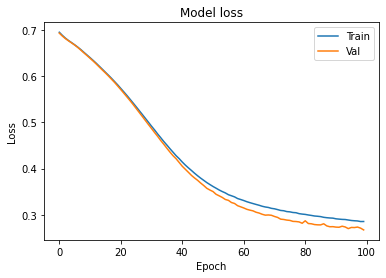

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

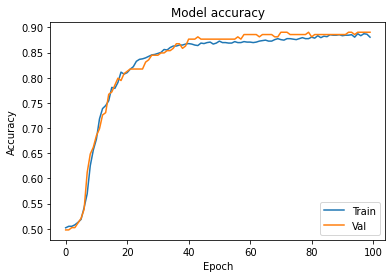

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [39]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [40]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 46ms/step - loss: 0.5629 - accuracy: 0.6751 - val_loss: 0.3402 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3667 - accuracy: 0.8614 - val_loss: 0.3116 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3120 - accuracy: 0.8683 - val_loss: 0.2907 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2828 - accuracy: 0.8802 - val_loss: 0.2477 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2628 - accuracy: 0.8945 - val_loss: 0.2671 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2508 - accuracy: 0.9096 - val_loss: 0.3623 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2460 - accuracy: 0.8958 - val_loss: 0.2748 - val_accuracy: 0.8995
Epoch 

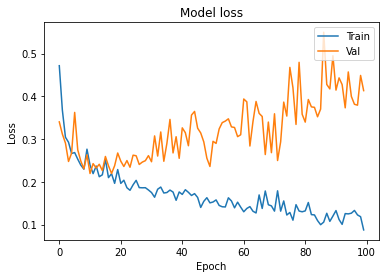

In [42]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

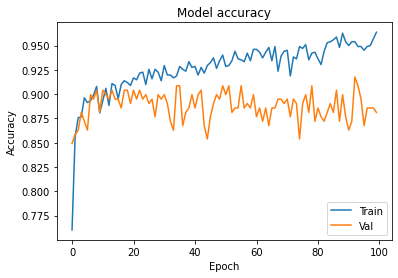

In [44]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [45]:
from keras.layers import Dropout
from keras import regularizers

In [46]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


In [47]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 60ms/step - loss: 21.1077 - accuracy: 0.5709 - val_loss: 3.9125 - val_accuracy: 0.7169
Epoch 2/100
32/32 [==============================] - 1s 47ms/step - loss: 2.4877 - accuracy: 0.8001 - val_loss: 0.6468 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.6293 - accuracy: 0.8412 - val_loss: 0.5128 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5433 - accuracy: 0.8567 - val_loss: 0.4773 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5019 - accuracy: 0.8739 - val_loss: 0.5199 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5004 - accuracy: 0.8718 - val_loss: 0.4465 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4831 - accuracy: 0.8740 - val_loss: 0.4725 - val_accuracy: 0.8721
Epoch

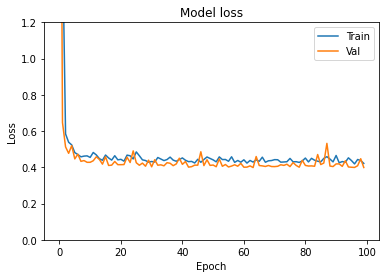

In [49]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

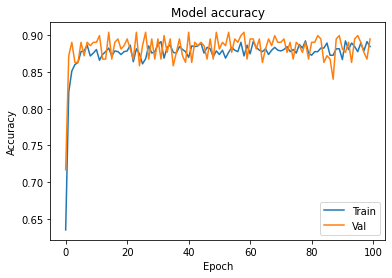

In [51]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()